# 빅데이터분석 07 


# 1. 텍스트 프로세싱 개념
- 의미 : 비정형 텍스트를 자동으로 분석해서 필요한 정보, 지식을 얻는 것

## 텍스트 프로세싱 분류
- statistical analysis : 단어(의미있는 단위) 빈도, 출현 수 등을 분석
- text classification : 정해진 topic category, sentiment(감성) 등으로 분류
- text extraction : 원하는 정보 (주제, 키워드, 고유명사) 추출 

## 통계적 분석
- 단어 빈도 :가장 많이 나오는 단어나 표현은 무엇인가? (예: 누가 더 많이 언급되는가?)
- collocation : 어떤 단어들이 같이 많이 나오는가 ( 예: 연관 검색어.. )
- TF-IDF 
    - 단어의 문서 내 중요성(weigth) 을 계산하는 대표적 척도
    - TF(term frequency) : 한 문서에서 어떤 단어가 몇번 나오는가 = 중요도
    - IDF (inverse document frequecy) : 문서 집합 내에서 그 단어가 몇개의 문서에서 나오는가 
    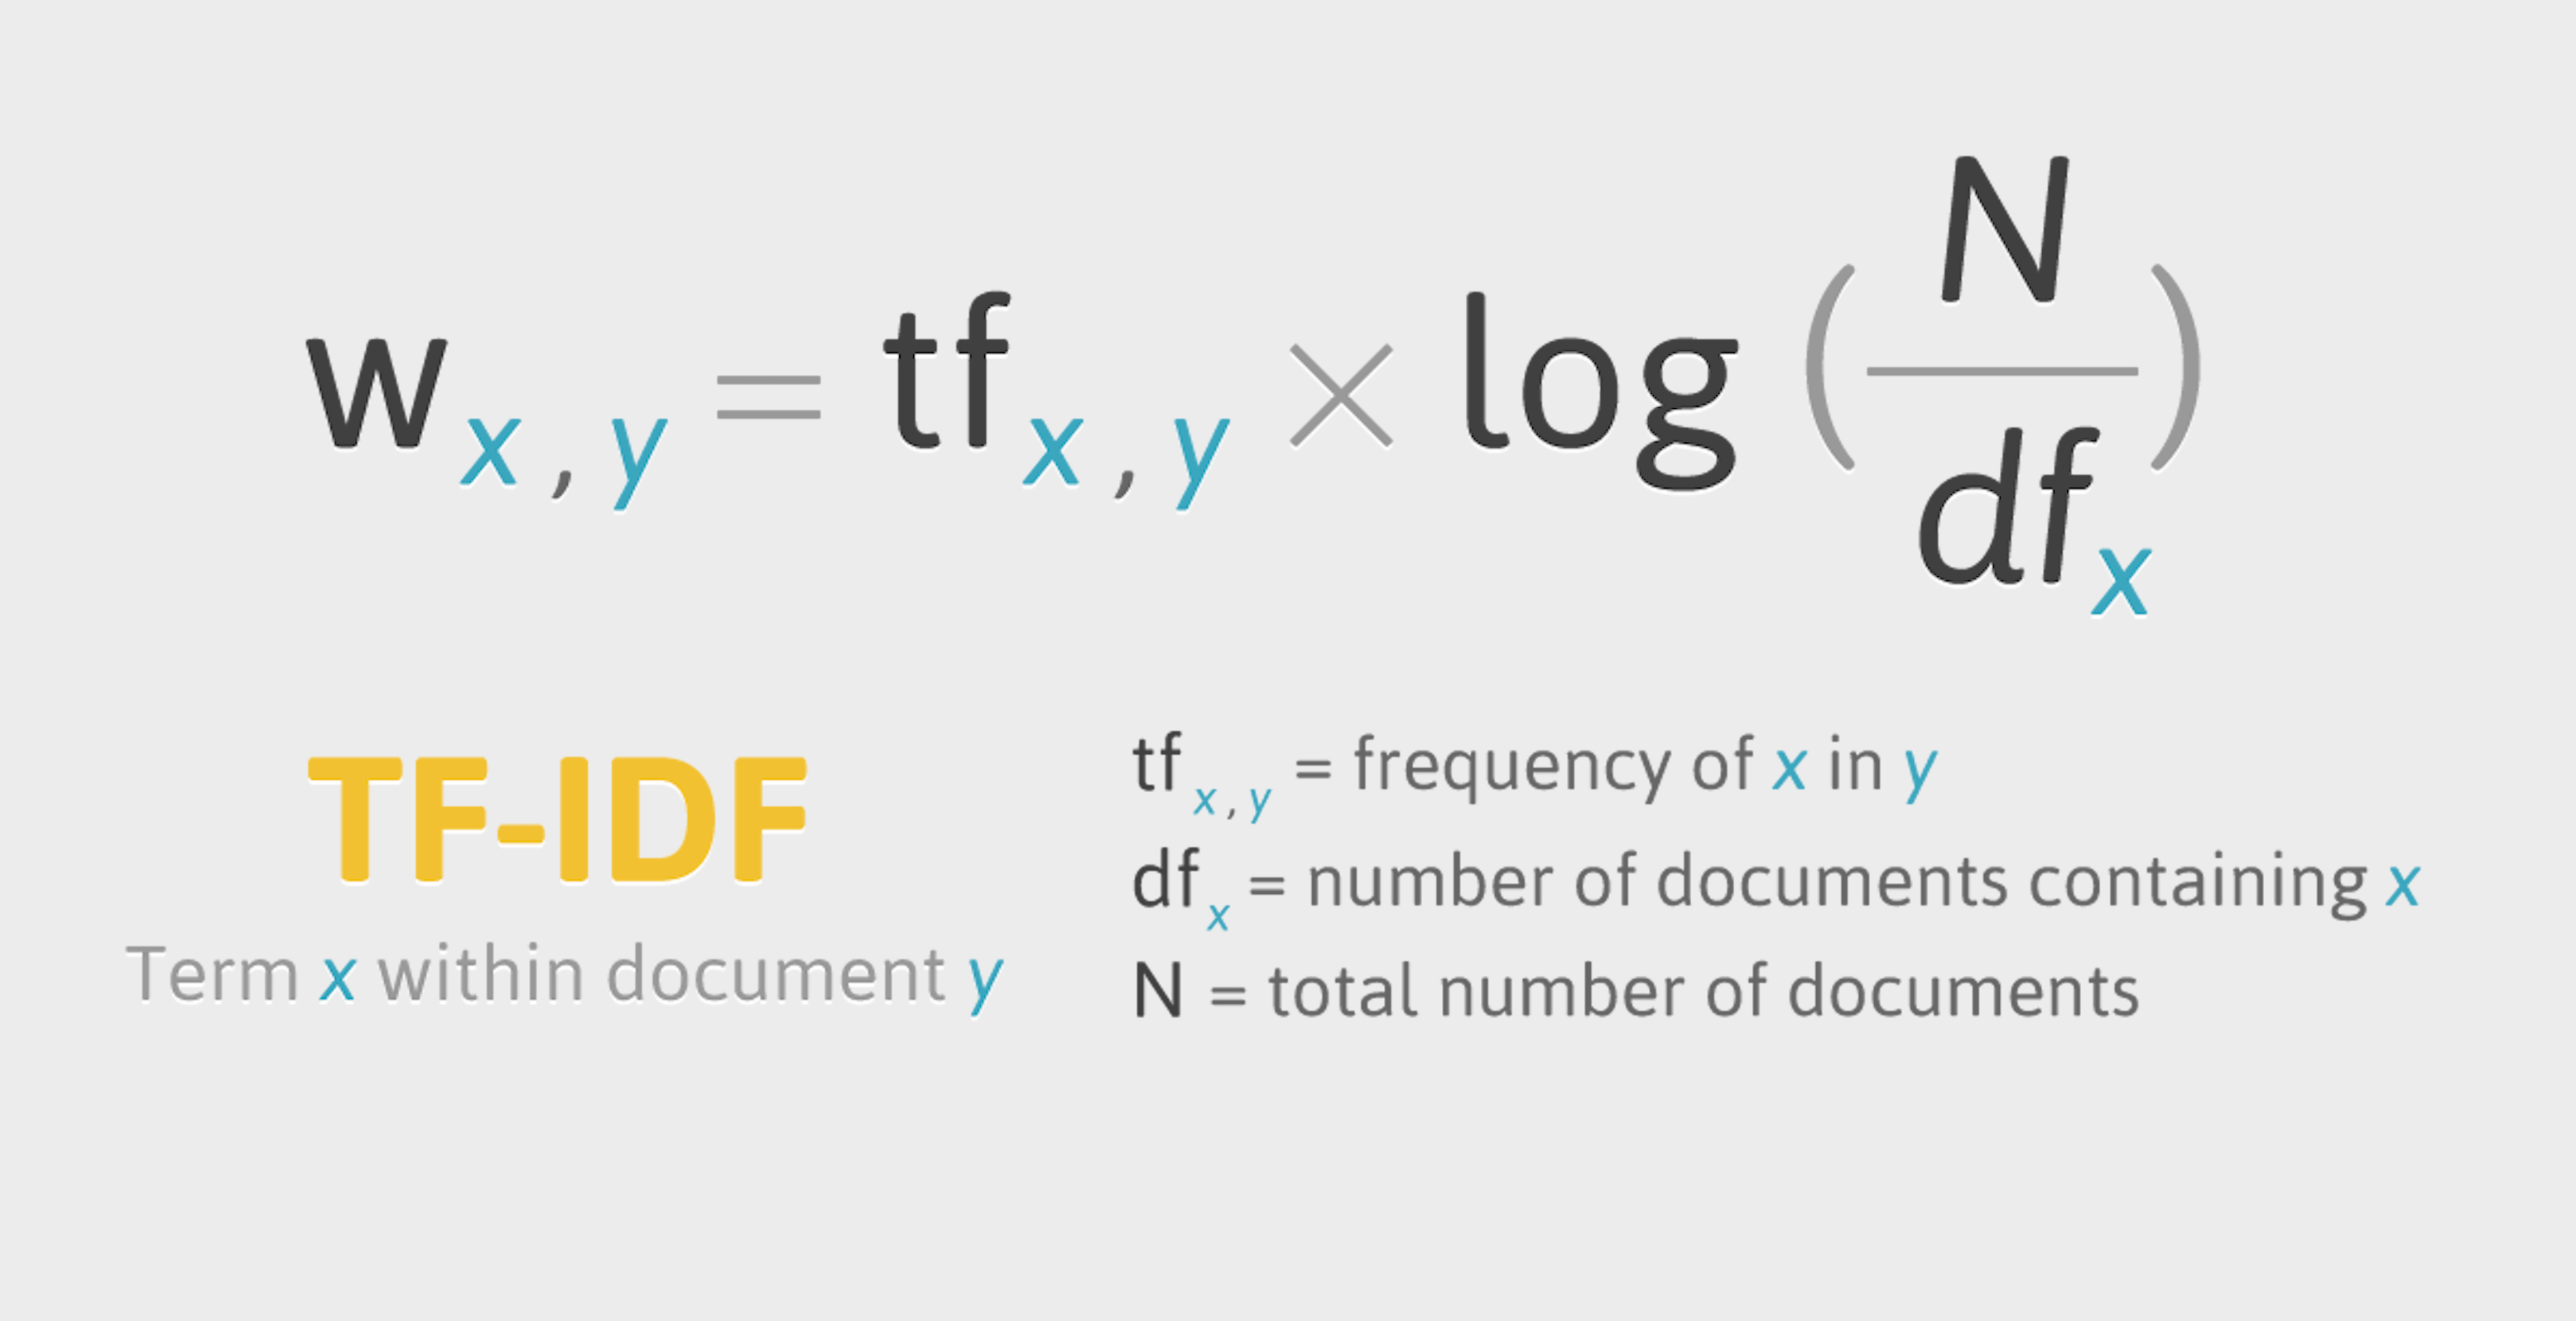
    
## 텍스트 분류
- topic analysis : 몇 개의 분류로 나누기, 무엇에 관한 것인가? 예) 온라인 쇼핑몰 리뷰 -> 가격, 품질, 배송, 친절 등
- sentiment analysis : 특정 상품, 사람, 주제에 대한 긍정/부정/중립 등 감성 분석
- intent detection : 의도 분석 ( 구매 의향, 정보 요청, ... )
    - 예) email response classifier : Interested, Not Interested, Unsubscribe, Autoresponder, Email Bounce, and Wrong Person
- language classification : 언어 자동 인식 

## 텍스트 추출
- 키워드 추출 : 대표 키워드 몇 개 선정
- 개체명 (고유명사) 인식 : 사람이름, 상표, 회사이름 등 인식(정확도가 중요)

# 2. 영어 텍스트 분석

## 영어 텍스트 분석 과정

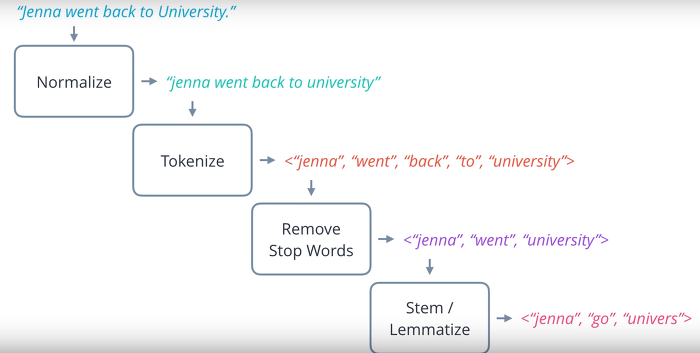



- Nomarlize : 소문자 추출
- Tokenize  : 단어 단위로 자름
- Remove Stop Words : keyword나 문장에 도움 안되는 단어 제거
- Stem / Lemmatize : 시제, 복수표현을 원형으로 바꿈
## 라이브러리 및 리소스 설치
- 최초 1회만 실행

In [1]:
#word cloud 시각화
#!pip install wordcloud  

import nltk   # natural language tool kit

nltk.download('stopwords')  #  stopword 목록
nltk.download('punkt')   # 문장 구분
nltk.download('wordnet')  # 단어 간 network 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

## 2.1  데이터 준비

## 파일 병합

- glob.glob() : *, ! , 경로 반영 파일 이름 만들기
- pd.read_excel() : 엑셀 파일 읽기

In [11]:
import glob

all_files = glob.glob('*.xls')

all_files 

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [12]:
import pandas as pd

all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

#all_files_data[0].head()
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [13]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat 

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


## 데이터 전처리 (Pre-processing)

In [14]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title.head()

0    Guest Editorial: Big Media Data: Understanding...
1    Guest Editorial: Big Scholar Data Discovery an...
2      Guest Editorial: Big Data Analytics and the Web
3    Parallel computing for preserving privacy usin...
4                         NoSQL databases for big data
Name: 제목, dtype: object

- text처리 : stopword, tokenizer, stemmizer

In [15]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

- 처리 
- 결과 모으기

In [16]:
import re 

words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 영문자만 남기기 
    #if re.match(r"[^a-zA-Z]+",  str(title)):
    #        print (title, "=>", EnWords)
    EnWordsToken = word_tokenize(EnWords.lower()) # (소문자화후) 토큰 나누기 
    #    print (EnWordsToken)
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # stopword
    #    print (EnWordsTokenStop)
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # lemmatize
    #    print (EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

In [17]:
print(words[:10])  

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud']]


- 여러 list 합치기 :  list(reduce(lambda x, y: x+y, list_of_list))

In [18]:
from functools import reduce
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

## 2.2 데이터 탐색

## 단어 빈도 탐색

- Counter ( 리스트 ) : count dictionary 생성

In [19]:
from collections import Counter

count = Counter(words2)

count   #출력하여 내용 확인

Counter({'guest': 12,
         'editorial': 17,
         'big': 1354,
         'medium': 11,
         'data': 1645,
         'understanding': 11,
         'search': 7,
         'mining': 40,
         'part': 1,
         'scholar': 3,
         'discovery': 13,
         'collaboration': 5,
         'analytics': 137,
         'web': 9,
         'parallel': 5,
         'computing': 25,
         'preserving': 2,
         'privacy': 17,
         'using': 57,
         'k': 7,
         'anonymisation': 1,
         'algorithm': 17,
         'nosql': 4,
         'database': 11,
         'computation': 2,
         'migration': 4,
         'new': 38,
         'approach': 44,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'towards': 12,
         'real': 14,
         'time': 17,
         'platform': 19,
         'health': 37,
         'application': 25,
         'accurate': 3,
         'distributed': 18,
         'cluster': 2,
         'analysis': 67,
         

- 빈출 단어 뽑기 
- count.most_common(n) : 결과를 tuple로 

In [20]:
word_count = {}

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))


data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


- 특정 단어 제거

In [21]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 단어 빈도 히스토그램

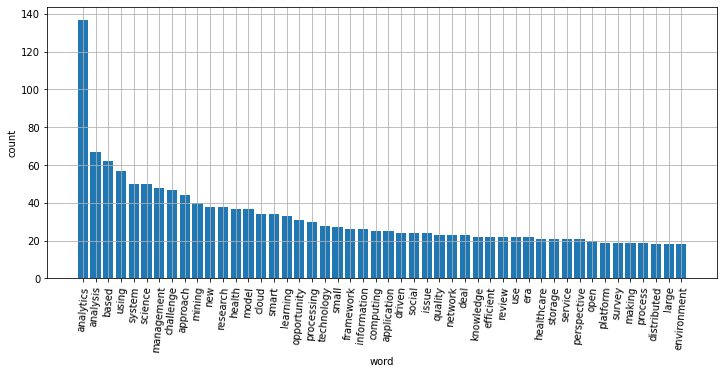

In [22]:
import matplotlib.pyplot as plt

# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='85')

plt.show()

## 2.3. 집계 분석 및 결과 시각화

## 연도별 데이터 수

In [23]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


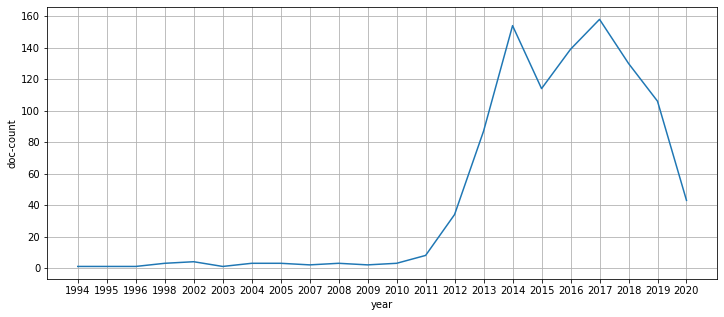

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 워드클라우드

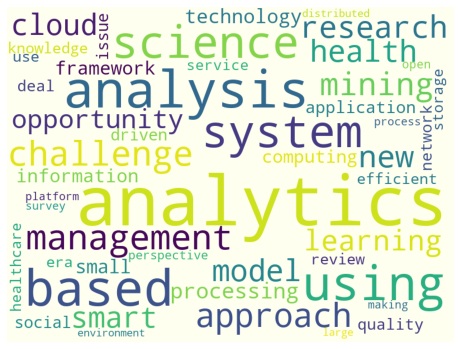

In [25]:
from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)

wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

- 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라짐
- 이미지 저장

In [21]:
cloud.to_file("riss_bigdata_wordCloud.jpg")

# 3. 한글 텍스트 분석

## NLP개념

- 단어 단위로 구성

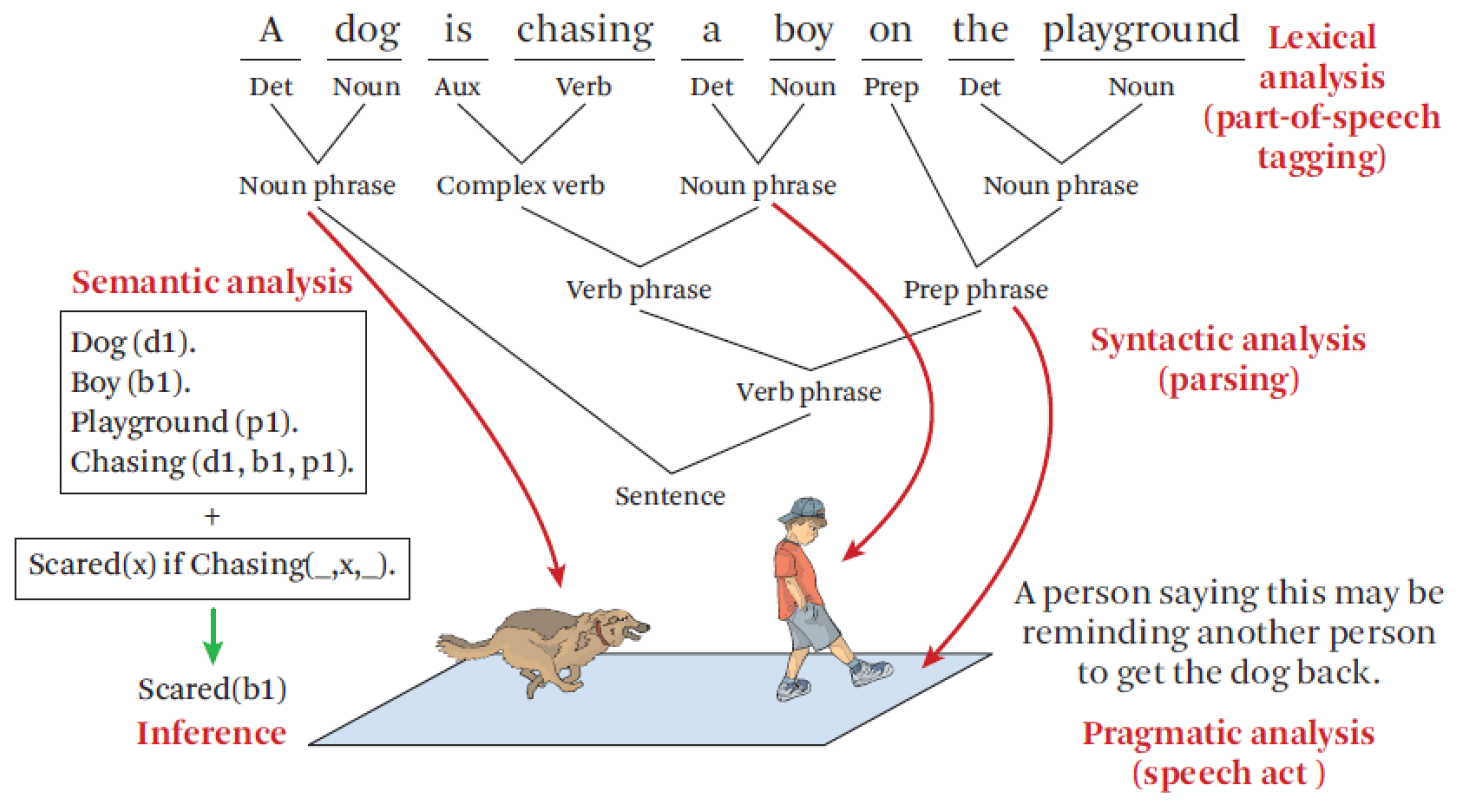

- Semantic analysis : 단어의 의미
- Syntaxtic analyis : 문장 구조
- Inference : 추론
- Pragmatic analysis : 어떤 의도로 문장이 쓰여지고 있는지
    
##  한국어 NLP

- 형태소 분석 만 다르다

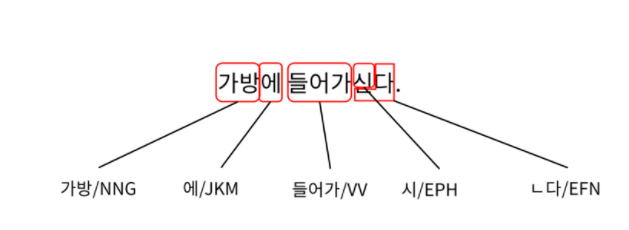

## n-gram 

- 언어와 무관하게 처리, n글자를 하나의 토큰으로 사용

## 한글 처리 라이브러리  설치
- JDK 설치 : anaconda 버전에 맞춰서 
    - https://www.oracle.com/java/technologies/javase-jdk16-downloads.html 
- %JAVA_HOME%  변수 설정
- jpype1 설치
- konlpy 설치 

In [22]:
#!pip install jpype1
#!pip install konlpy

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


- test 

In [1]:
from konlpy.tag import Okt
okt=Okt()
print(okt.pos('아버지가 방에 들어가신다'))

*** D:\anaconda3\Lib\site-packages\konlpy\java\bin;D:\anaconda3\Lib\site-packages\konlpy\java\jhannanum-0.8.4.jar;D:\anaconda3\Lib\site-packages\konlpy\java\kkma-2.0.jar;D:\anaconda3\Lib\site-packages\konlpy\java\aho-corasick.jar;D:\anaconda3\Lib\site-packages\konlpy\java\shineware-common-1.0.jar;D:\anaconda3\Lib\site-packages\konlpy\java\shineware-ds-1.0.jar;D:\anaconda3\Lib\site-packages\konlpy\java\komoran-3.0.jar;D:\anaconda3\Lib\site-packages\konlpy\java\snakeyaml-1.12.jar;D:\anaconda3\Lib\site-packages\konlpy\java\scala-library-2.12.3.jar;D:\anaconda3\Lib\site-packages\konlpy\java\open-korean-text-2.1.0.jar;D:\anaconda3\Lib\site-packages\konlpy\java\twitter-text-1.14.7.jar
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


In [2]:
from konlpy.tag import Kkma
kma=Kkma()
print(kma.pos('아버지가 방에 들어가신다'))

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]


- error 발생시,  C:\Users\user\anaconda3\Lib\site-packages\konlpy 의 jvm.py 를 첨부 파일의 jvm.py로 교체



## 3.1 데이터 준비

- 파일 읽기

In [3]:
import json
inputFileName = 'etnews.kr_facebook'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data 

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

- 분석할 데이터 추출

In [26]:
message = ''

for item in data:
    if 'message' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['message']) +''   # 문자, 숫자만 남기기
        
message

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

- 품사 태깅 : 명사 추출

In [27]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N  

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

## 3.2 데이터 탐색 
- 단어 빈도 탐색

In [28]:
count = Counter(message_N)

count 

Counter({'스파크': 3,
         '포럼': 5,
         '미래': 3,
         '시대': 7,
         '조직': 4,
         '변화': 3,
         '시작': 1,
         '현': 1,
         '사회': 3,
         '문제': 1,
         '및': 1,
         '이슈': 2,
         '제기': 1,
         '그': 1,
         '혁신': 1,
         '해결': 1,
         '소셜': 2,
         '이노': 1,
         '베이': 1,
         '터': 4,
         '발굴': 1,
         '지원': 1,
         '우리': 2,
         '확산': 1,
         '위해': 2,
         '도전': 1,
         '만남': 1,
         '자리': 1,
         '차': 23,
         '산업혁명': 22,
         '기업': 3,
         '직문': 1,
         '실험': 1,
         '사례': 2,
         '통해': 4,
         '방향': 1,
         '생각': 1,
         '로봇': 3,
         '주요': 2,
         '성장': 1,
         '동력': 1,
         '국내': 2,
         '재': 1,
         '평가': 1,
         '분석': 1,
         '금융': 1,
         '산업': 10,
         '전반': 1,
         '점검': 1,
         '공통': 1,
         '간판': 1,
         '공약': 1,
         '선도': 1,
         '도시': 1,
         '구현': 1,
         '

In [29]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


- 히스토그램

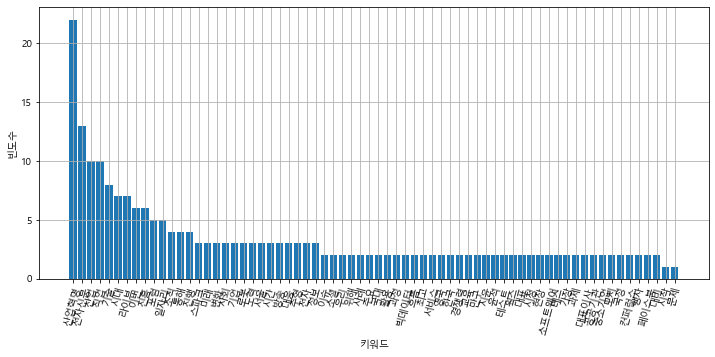

In [30]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

- 워드 클라우드

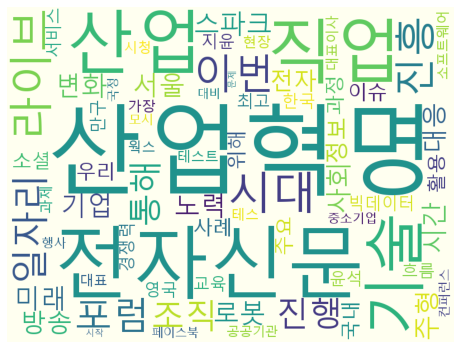

In [31]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [32]:
cloud.to_file(inputFileName + '_cloud.jpg')

## 과제 1 
- 오늘자 (과제 수행일) 한국어 뉴스 파일 10개를 모아서 (파일 함께 제출) 
- 전체 빈출 명사 50개의 빈도를 히스토그램으로 표현하고
- 문서 별 명사의 TF-IDF를 계산해 출력하시오
- 제출 : hw07.ipynb 와 0.txt ~ 9.txt 파일을 hw07.zip으로 제출 

In [10]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df))

def tfidf(t, d):
    return tf(t,d)* idf(t)

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '먹고 길고 노란 바나나 바나나',
  '먹고 저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
N = len(docs) # 총 문서의 수

In [11]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,1,2,0,0,0,0
3,1,0,0,1,0,0,0,1,1


In [12]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,1.386294
길고,1.386294
노란,1.386294
먹고,0.000000
바나나,0.693147
사과,1.386294
싶은,0.693147
저는,1.386294
좋아요,1.386294


In [13]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.0,0.000000,1.386294,0.693147,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.693147,0.000000,0.693147,0.000000,0.000000
2,0.000000,1.386294,1.386294,0.0,1.386294,0.000000,0.000000,0.000000,0.000000
3,1.386294,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.386294,1.386294
